In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import models,layers 

In [111]:
Image_size=256
Batch_size=32
Channels=3
Epochs=15

In [113]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    r"D:\vishnu\Potato Disease Classification\PlantVillage2",
    shuffle=True,
    image_size=(Image_size,Image_size),
    batch_size=Batch_size
)

Found 16011 files belonging to 10 classes.


In [114]:
class_names=dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [117]:
len(dataset)

501

In [119]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[7 4 2 4 4 7 7 6 0 5 6 2 5 2 0 7 4 9 7 6 7 2 0 7 6 3 7 4 5 3 4 0]


In [ ]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0])
    

tf.Tensor(
[[[131. 119. 119.]
  [116. 104. 104.]
  [125. 113. 113.]
  ...
  [172. 163. 166.]
  [182. 173. 176.]
  [150. 141. 144.]]

 [[109.  97.  97.]
  [111.  99.  99.]
  [124. 112. 112.]
  ...
  [179. 170. 173.]
  [173. 164. 167.]
  [179. 170. 173.]]

 [[124. 112. 112.]
  [110.  98.  98.]
  [112. 100. 100.]
  ...
  [172. 163. 166.]
  [155. 146. 149.]
  [169. 160. 163.]]

 ...

 [[133. 122. 126.]
  [132. 121. 125.]
  [139. 128. 132.]
  ...
  [142. 131. 135.]
  [157. 146. 150.]
  [139. 128. 132.]]

 [[148. 137. 141.]
  [138. 127. 131.]
  [139. 128. 132.]
  ...
  [149. 138. 142.]
  [156. 145. 149.]
  [163. 152. 156.]]

 [[140. 129. 133.]
  [125. 114. 118.]
  [131. 120. 124.]
  ...
  [181. 170. 174.]
  [163. 152. 156.]
  [166. 155. 159.]]], shape=(256, 256, 3), dtype=float32)


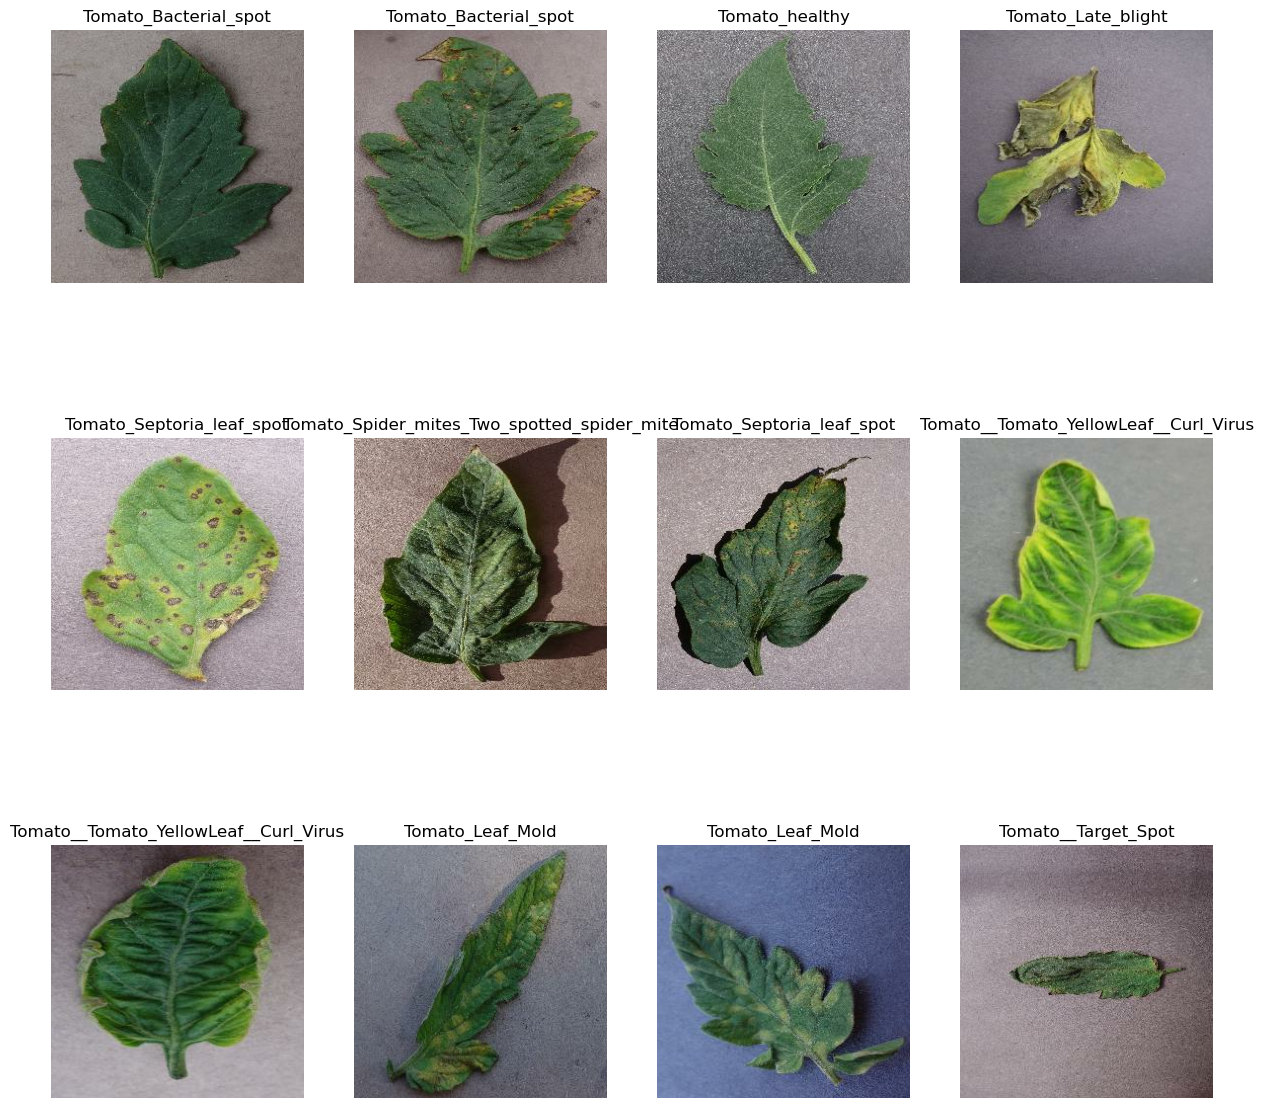

In [123]:
plt.figure(figsize=(15,15))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [125]:
image_count=len(dataset)
image_count

501

In [127]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds,val_ds, test_ds

In [129]:
train_ds, val_ds, test_ds= get_dataset_partitions_tf(dataset)

In [131]:
len(train_ds)

400

In [133]:
len(test_ds)

51

In [135]:
len(val_ds)

50

In [137]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [139]:
resize_and_rescale=tf.keras.Sequential([
    tf.keras.layers.Resizing(Image_size,Image_size),
    tf.keras.layers.Rescaling(1.0/255)
])

In [141]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])

In [143]:
for image, label in train_ds.take(1):
    print(image.shape)

(32, 256, 256, 3)


In [161]:
Image_size = 256
Batch_size = 32
Channels = 3
Epochs = 15
n_classes = 10

# Define input shape
input_shape = (Image_size, Image_size, Channels)

# Construct the model
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Resizing(Image_size,Image_size),
    layers.Rescaling(1.0/255),
    layers.RandomFlip("horizontal_and_vertical"),
    
    layers.RandomRotation(0.2),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [163]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing_3 (Resizing)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_5 (Rescaling)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip_5 (RandomFlip)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_5 (RandomRotation)   │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_54 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_55 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_56 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_57 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_58 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_59 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 184,202 (719.54 KB)

 Trainable params: 184,202 (719.54 KB)

 Non-trainable params: 0 (0.00 B)

In [165]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
    )

In [167]:
history=model.fit(
    train_ds,
    epochs=Epochs,
    batch_size=Batch_size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 308s 731ms/step - accuracy: 0.2979 - loss: 1.9388 - val_accuracy: 0.4563 - val_loss: 1.6617
Epoch 2/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 461s 1s/step - accuracy: 0.5600 - loss: 1.2053 - val_accuracy: 0.6938 - val_loss: 0.9451
Epoch 3/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 487s 1s/step - accuracy: 0.7278 - loss: 0.7596 - val_accuracy: 0.7244 - val_loss: 0.7842
Epoch 4/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 495s 1s/step - accuracy: 0.8074 - loss: 0.5460 - val_accuracy: 0.7381 - val_loss: 0.8981
Epoch 5/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 517s 1s/step - accuracy: 0.8425 - loss: 0.4305 - val_accuracy: 0.7694 - val_loss: 0.7893
Epoch 6/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 470s 1s/step - accuracy: 0.8659 - loss: 0.3723 - val_accuracy: 0.8381 - val_loss: 0.4783
Epoch 7/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 438s 1s/step - accuracy: 0.8921 - loss: 0.2994 - val_accuracy: 0.8200 - val_loss: 0.5704
Epoch 8/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 492s 1s/step - accuracy: 0.8987 - loss: 0.2875 - val_a

In [169]:
scores=model.evaluate(test_ds)

51/51 ━━━━━━━━━━━━━━━━━━━━ 40s 316ms/step - accuracy: 0.9153 - loss: 0.2644


In [170]:
scores

[0.259972482919693, 0.9148284196853638]

In [171]:
history

In [172]:
history.params

{'verbose': 1, 'epochs': 15, 'steps': 400}

In [173]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [179]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

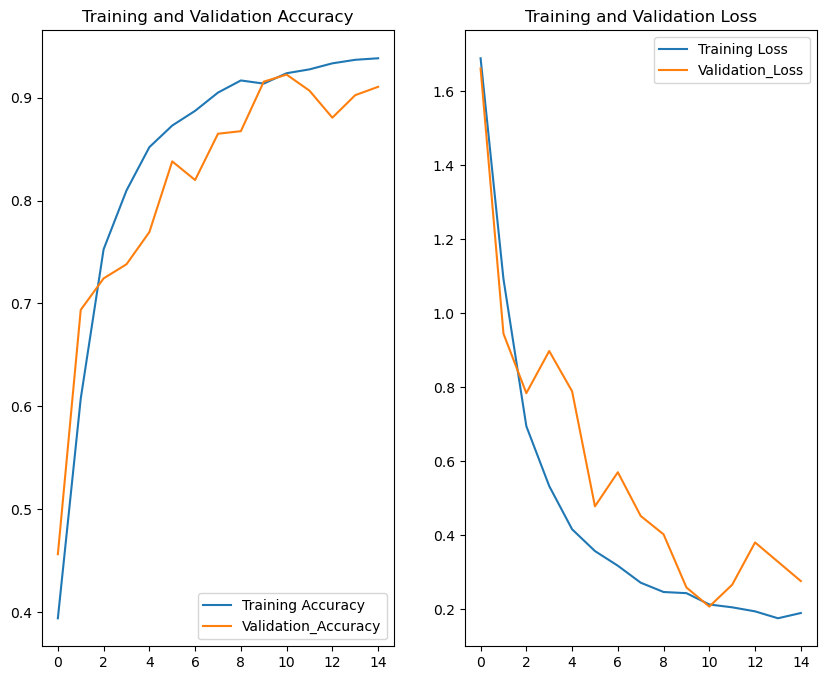

In [181]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.plot(range(Epochs),acc,label='Training Accuracy')
plt.plot(range(Epochs),val_acc,label="Validation_Accuracy")
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")
plt.subplot(1,2,2)
plt.plot(range(Epochs),loss,label='Training Loss')
plt.plot(range(Epochs),val_loss,label="Validation_Loss")
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")

[[[120 109 115]
  [129 118 124]
  [ 85  74  80]
  ...
  [128 115 122]
  [141 128 135]
  [104  91  98]]

 [[104  93  99]
  [ 79  68  74]
  [105  94 100]
  ...
  [127 114 121]
  [105  92  99]
  [150 137 144]]

 [[191 180 186]
  [110  99 105]
  [190 179 185]
  ...
  [ 96  83  90]
  [116 103 110]
  [147 134 141]]

 ...

 [[194 187 194]
  [ 92  85  92]
  [121 114 121]
  ...
  [146 137 140]
  [180 171 174]
  [146 137 140]]

 [[152 145 152]
  [113 106 113]
  [169 162 169]
  ...
  [141 132 135]
  [180 171 174]
  [149 140 143]]

 [[136 129 136]
  [129 122 129]
  [136 129 136]
  ...
  [173 164 167]
  [141 132 135]
  [169 160 163]]]


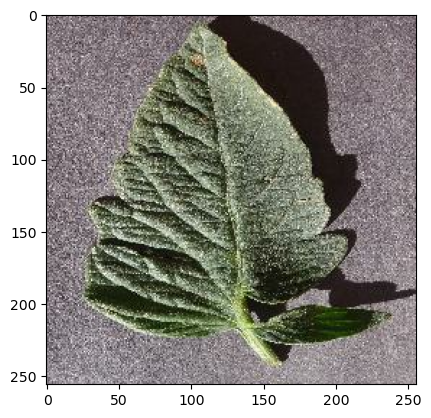

In [183]:
for images_batch, labels_batch in test_ds.take(1):
    print(images_batch[0].numpy().astype('uint8'))
    plt.imshow(images_batch[0].numpy().astype('uint8'))

First Image to predict
actual label: Tomato_Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted label: Tomato_Early_blight


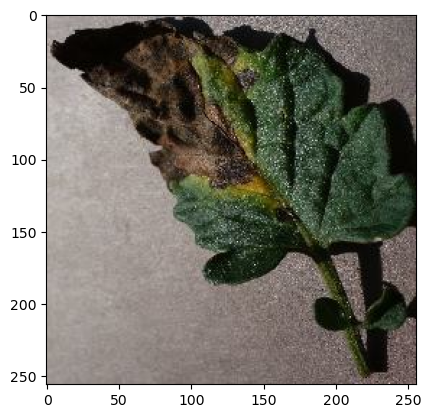

In [185]:
import numpy as np
for images_batch,label_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=label_batch[0].numpy()

    print("First Image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("Predicted label:",class_names[np.argmax(batch_prediction[0])])
    

In [187]:
def predict(model,img):
    img_array =tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array =tf.expand_dims(img_array,0)

    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence= round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


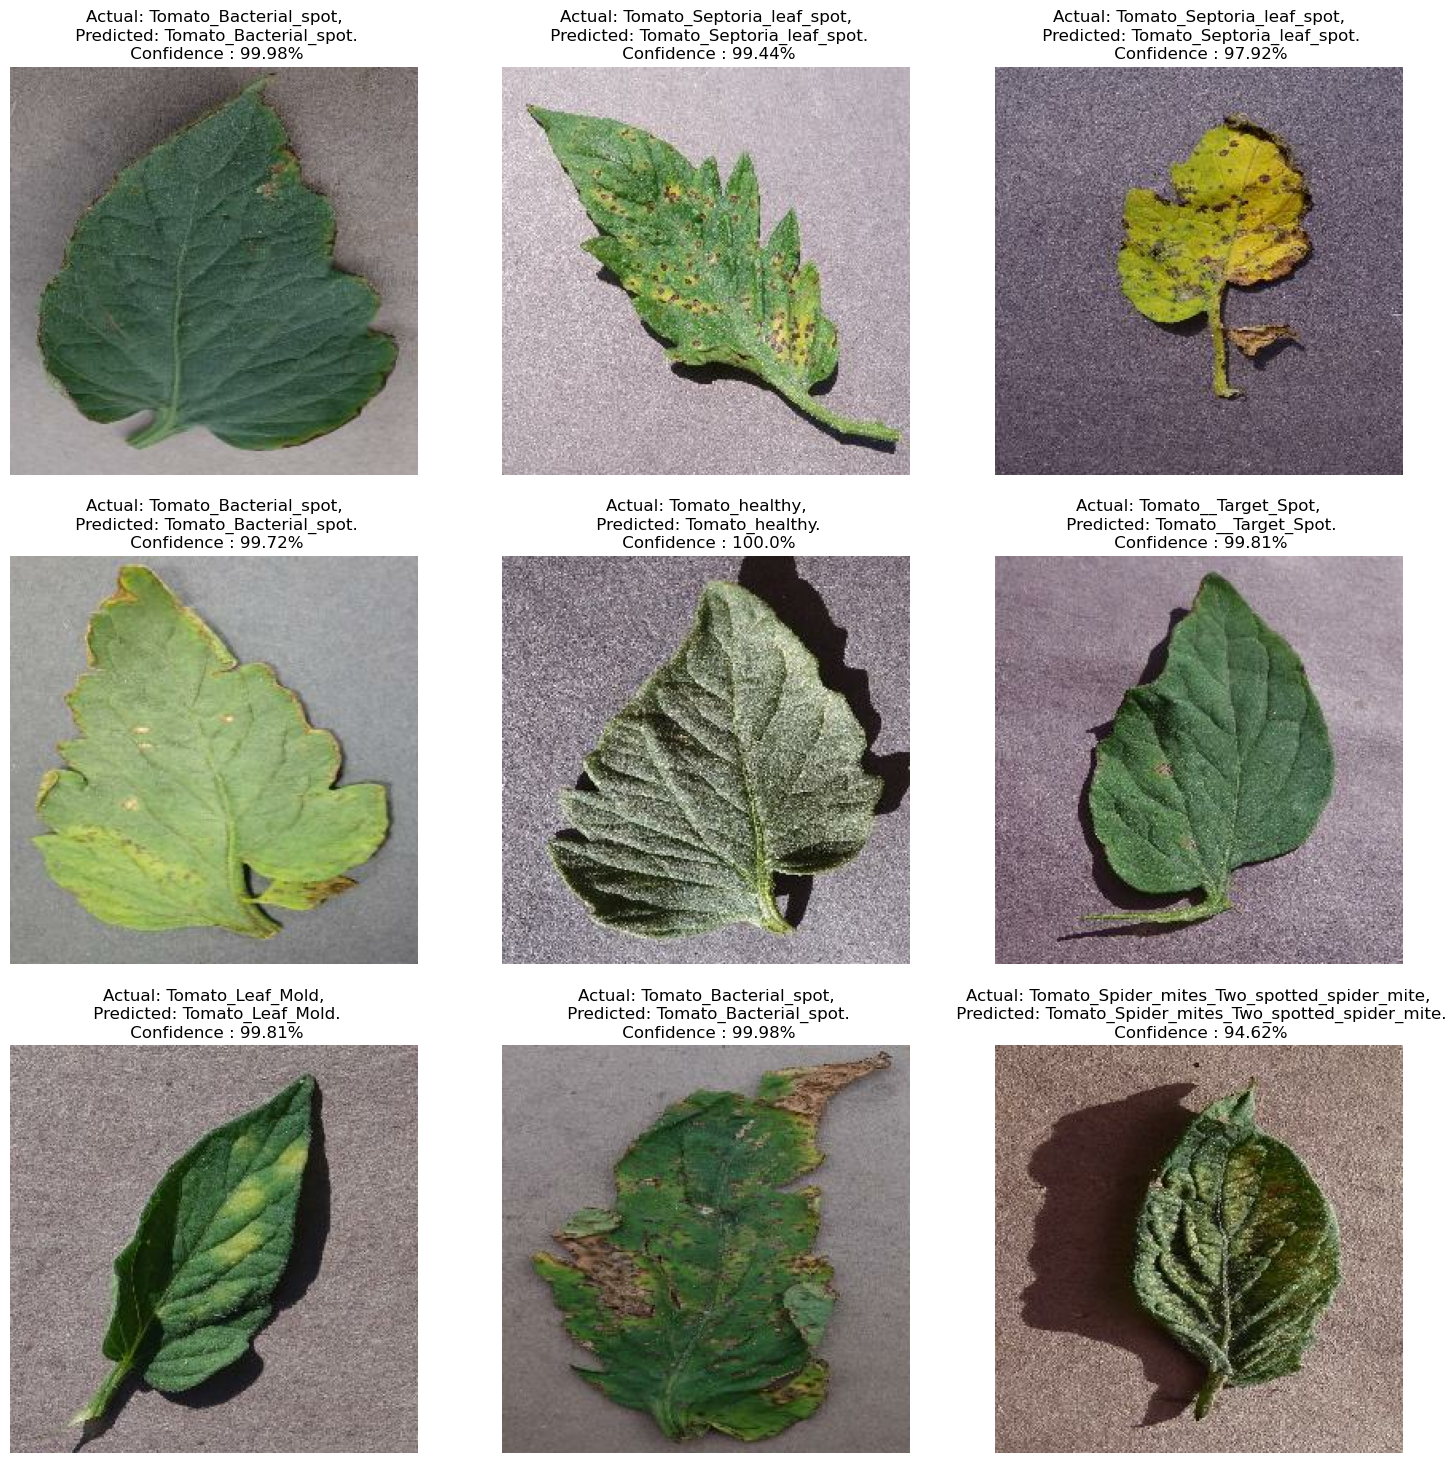

In [191]:
plt.figure(figsize=(18,18))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class= class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence : {confidence}%")
        plt.axis("off")

In [201]:
model_version_tomato= 1
model.save(fr"D:\vishnu\Potato Disease Classification\Saved_models{model_version_tomato}.h5")


In [197]:
import os
print(os.path.exists(r"D:\vishnu\Potato Disease Classification\Saved_models"))

#D:\vishnu\Potato Disease Classification\Saved_models


True
